# PepsiCo Data Science Challenge - Crop Quality Assessment

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-Pre-Processing" data-toc-modified-id="Data-Pre-Processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Pre-Processing</a></span><ul class="toc-item"><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Merging-Dataframes" data-toc-modified-id="Merging-Dataframes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Merging Dataframes</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data Cleaning</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Variety" data-toc-modified-id="Variety-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Variety</a></span></li><li><span><a href="#Assessment-Type" data-toc-modified-id="Assessment-Type-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Assessment Type</a></span></li><li><span><a href="#Growth-Stage" data-toc-modified-id="Growth-Stage-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Growth Stage</a></span></li><li><span><a href="#Time-of-Year" data-toc-modified-id="Time-of-Year-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Time of Year</a></span></li><li><span><a href="#Location" data-toc-modified-id="Location-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Location</a></span></li></ul></li><li><span><a href="#Data-Processing" data-toc-modified-id="Data-Processing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Processing</a></span><ul class="toc-item"><li><span><a href="#Parsing-Weather-Data" data-toc-modified-id="Parsing-Weather-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Parsing Weather Data</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Machine-Learning-Pre-Processing" data-toc-modified-id="Machine-Learning-Pre-Processing-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Machine Learning Pre-Processing</a></span></li><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Principal Component Analysis</a></span></li></ul></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Building</a></span><ul class="toc-item"><li><span><a href="#Lasso" data-toc-modified-id="Lasso-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Lasso</a></span></li><li><span><a href="#K-Neighbors" data-toc-modified-id="K-Neighbors-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>K-Neighbors</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Support-Vector" data-toc-modified-id="Support-Vector-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Support Vector</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introduction

This notebook contains my solution to the PepsiCo Data Science Challenge 2020. The dataset and objective was made available on September 25th, 2020, and challengers had until October 7th 2020 to submit their solution. The Grand Prize winner received a PepsiCo R&D internship for the summer of 2021. I was chosen as a finalist for the competition, and was given the opportunity to present my solution to a panel of judges. The background and challenge objective are described below, taken directly from the challenge website at https://www.nyas.org/challenges/pepsico-challenge/?utm_source=PepsiCo+Data+Challenge+2020&utm_campaign=f8b6f08078-EMAIL_CAMPAIGN_2020_09_24_08_56&utm_medium=email&utm_term=0_0568b79be0-f8b6f08078-331280438.

Background: Cereal based products rely on raw grain from crops grown by farmers. Different growing locations and environmental conditions are known to influence grain physical and compositional elements which can affect processing and final product quality. The goal of this exercise is to create a model that can predict the effect of growing location, soil type, fertilizer, and crop parameters associated with growth and development on product assessment.

Challenge: A model predicting the assessment score would allow growers to assess product quality. Given the provided datasets, derive a model that would predict the assessment scores as accurately as possible using relevant features or predictor variables.

The following packages and libraries used in this project are imported below:

In [1]:
#turn off warnings
import warnings
warnings.filterwarnings('ignore')

#import packages that will be used in this project
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Data Pre-Processing

### Loading Data

The dataset has been downloaded in the form of an excel file with 3 sheets:

1. Crop and Grain Data

2. Weather Data

3. Site Data

We will begin the project by loading the data in to Pandas DataFrames. The descriptions for each sheet, taken directly from the challenge website, with the code that reads each sheet, is below:

The Crop and Grain dataset consists of field trials conducted over several years in 5 different locations identified by the Site ID column. Each of the trials had several replicates on which 28 assessment types were measured. Note that the year appended within the Site ID is the harvest year.

The other columns in the dataset are:

- Growth Stage: The crop growth stage on the date that the assessments were conducted; values are ordinal.
- Variety: B and M are the crop varieties grown in the trials.
- Assessment Type: The types of assessments (or KPIs - key performance indicators) measured on the crop.
- Assessment Date: The dates when the assessment types were evaluated.
- Assessment Score: The evaluation scores on each KPI.

In [2]:
#load in dataset
crop_grain_data = pd.read_excel(r'C:\Users\CCCam\OneDrive\DataScience\PepsiCo\nyas-challenge-2020-data.xlsx',sheet_name=0)

#view first few rows of data
crop_grain_data.head()

,ID,Site ID,Growth Stage,Variety,Assessment Date (mm/dd/year),Assessment Type,Assessment Score
0,1,Site E Year 2015,59,M,2015-06-24,C - K,6.2
1,2,Site E Year 2015,75,M,2015-07-10,C - G,2.97283
2,3,Site E Year 2015,87,B,2015-07-25,C - I,71.9144
3,4,Site D Year 2015,87,B,2015-08-06,C - S,95.8586
4,5,Site E Year 2015,59,B,2015-06-15,C - P,450.575


Site metadata are also provided and include:

- Latitude and Elevation of the trial sites
- Sowing and Harvest dates of the trial crops
- Relevant soil parameters and fertilizer quantities; Soil Parameter A has valued at the nominal level.

In [3]:
#load in dataset
site_data = pd.read_excel(r'C:\Users\CCCam\OneDrive\DataScience\PepsiCo\nyas-challenge-2020-data.xlsx',sheet_name=2)

#view first few rows of data
site_data.head()

,Site ID,Latitude,Elevation (m),Sowing Date (mm/dd/year),Harvest Date (mm/dd/year),Soil Parameter A,Soil Parameter B,Amount Fertilizer Applied
0,Site A 2015,52.428385,26.0,2014-10-17,2015-09-01,6,26.9,120.0
1,Site B 2015,52.264336,18.0,2014-10-11,2015-08-12,6,22.6,89.7
2,Site C 2015,54.055351,143.0,2014-10-13,2015-09-06,2,18.9,250.0
3,Site D 2015,56.485340,148.0,2014-09-22,2015-08-28,1,20.0,80.0
4,Site E 2015,51.184087,77.0,2014-09-22,2015-09-04,5,9.6,125.0


Weather data from weather stations installed at each of the trial sites is also included. There are 6 relevant weather parameters in the data. The dates when the data were gathered are included in the weather worksheet.

In [4]:
#load in dataset
weather_data = pd.read_excel(r'C:\Users\CCCam\OneDrive\DataScience\PepsiCo\nyas-challenge-2020-data.xlsx',sheet_name=1)

#view first few rows of data
weather_data.head()

,Site ID,Date (mm/dd/year),Weather Variable A,Weather Variable B,Weather Variable C,Weather Variable D,Weather Variable E,Weather Variable F
0,Site A 2015,2014-10-18,18.7,14.8,0.0,5.4,17.494616,82.0
1,Site A 2015,2014-10-19,16.3,14.6,5.0,5.6,15.550769,79.0
2,Site A 2015,2014-10-20,14.4,11.6,14.6,4.0,9.233269,90.0
3,Site A 2015,2014-10-21,12.3,9.6,0.8,6.6,28.671731,69.0
4,Site A 2015,2014-10-22,14.0,8.2,0.4,3.8,15.064808,72.0


### Merging Dataframes

Now that the sheets have been loaded in, we will combine the data in to a single DataFrame. We will merge the Crop and Grain dataset and Site dataset on the Site ID column. The Weather dataset will be revisited during the feature engineering phase, as its structure does not allow it to be merged cleanly with the other datasets. 

In [5]:
#remove Year from Site ID in crop_grain_data so it can be merged with site_data
crop_grain_data['Site ID'] = crop_grain_data['Site ID'].apply(lambda x: x.replace(' Year','')).astype(str)

#merge dataframes
df = crop_grain_data.merge(site_data,how='left', on='Site ID')

#show result
df.head()

,ID,Site ID,Growth Stage,Variety,Assessment Date (mm/dd/year),Assessment Type,Assessment Score,Latitude,Elevation (m),Sowing Date (mm/dd/year),Harvest Date (mm/dd/year),Soil Parameter A,Soil Parameter B,Amount Fertilizer Applied
0,1,Site E 2015,59,M,2015-06-24,C - K,6.2,51.184087,77.0,2014-09-22,2015-09-04,5,9.6,125.0
1,2,Site E 2015,75,M,2015-07-10,C - G,2.97283,51.184087,77.0,2014-09-22,2015-09-04,5,9.6,125.0
2,3,Site E 2015,87,B,2015-07-25,C - I,71.9144,51.184087,77.0,2014-09-22,2015-09-04,5,9.6,125.0
3,4,Site D 2015,87,B,2015-08-06,C - S,95.8586,56.485340,148.0,2014-09-22,2015-08-28,1,20.0,80.0
4,5,Site E 2015,59,B,2015-06-15,C - P,450.575,51.184087,77.0,2014-09-22,2015-09-04,5,9.6,125.0


### Data Cleaning

Some values in Assessment Score seem to be represented as a "\*". This is a problem as this column should have continuous numbers. For now, we will replace these with NaN's, and convert this column to float.

In [6]:
#replace *'s as NaN's
df.replace('*',np.nan,inplace=True)

#convert column to float
df['Assessment Score'] = df['Assessment Score'].astype(float)
df['Assessment Score'].dtype

dtype('float64')

The data will be split in to a train set and test set. Twenty percent of the data will be used for the test set.

In [7]:
#split data in to train set and test set
df_train, df_test = train_test_split(df, test_size=.2, random_state=0)

## Exploratory Data Analysis

The next step is to explore the data to find any relevant trends. We set the style as 'darkgrid' for our charts.

In [8]:
#set chart style for all seaborn plots
sns.set_style('darkgrid')

### Variety

There are two categories in the Variety column: B and M. These two varieties are evenly represented in the data - 50.2% for B and 49.8% for M.

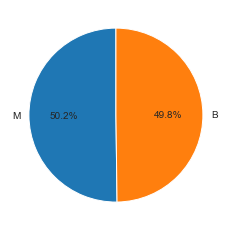

In [9]:
#create pie chart of variety
plt.pie(df_train['Variety'].value_counts(),startangle=90,autopct='%1.1f%%',labels=df_train['Variety'].value_counts().index)
plt.show()

### Assessment Type

There are over 25 assessment types crops are scored on. The distribution is heavily imbalanced, with almost one-third of the data being assessed by the C-K type, while the majority of assessment types do not even reach 5% representation in the data. It is clear that crop variety is evenly balanced amongst each assessment type.

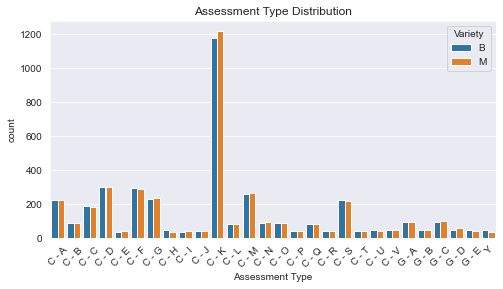

In [10]:
#create bar chart of assessment types frequencies
plt.figure(figsize=(8,4))
sns.countplot(data=df_train, x='Assessment Type', order = sorted(df_train['Assessment Type'].unique()),hue='Variety',hue_order=['B','M'])
plt.xticks(rotation=45)
plt.title('Assessment Type Distribution')
plt.show()

The scales for assessment score vary greatly based on each assessment type. Type C-J scores max out at around .8, while type C-N has some scores over 1,000. For some assessment types, the variety of the crop plays a huge impact on its assessment score, such as C-H, C-I, and G-B. For other assessment types, variety does not have a huge impact on the median score, but influences score spread: C-J, C-L, C-G. While for many, variety does not have a notable effect on the score distributions. These include C-K, C-M, and C-S.

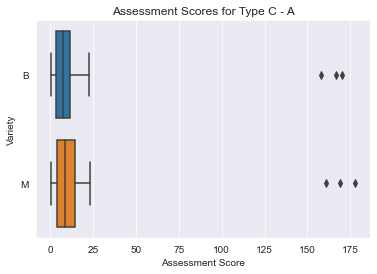

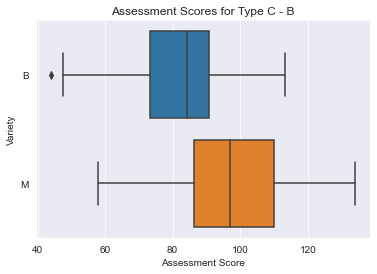

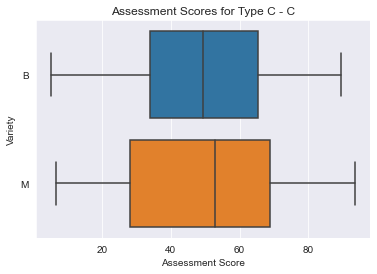

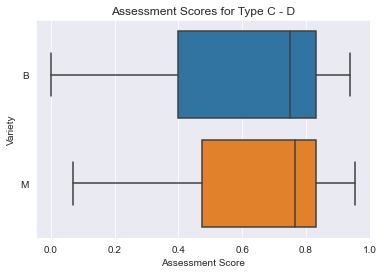

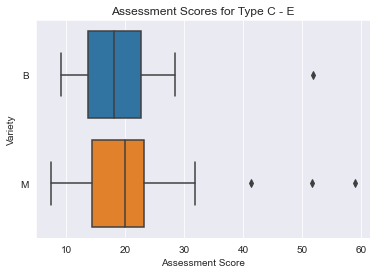

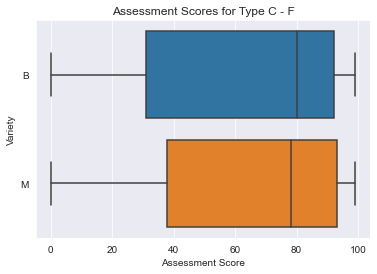

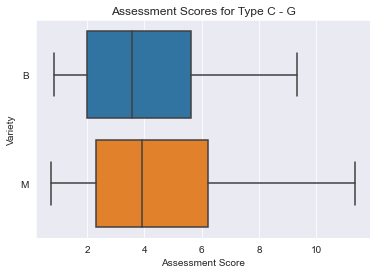

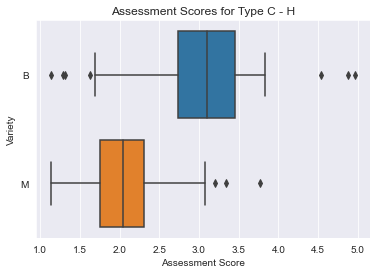

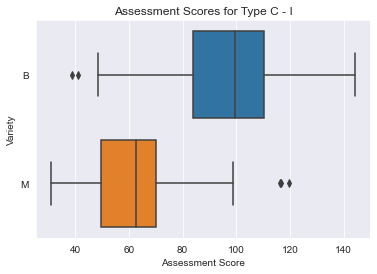

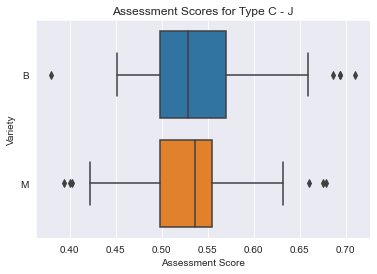

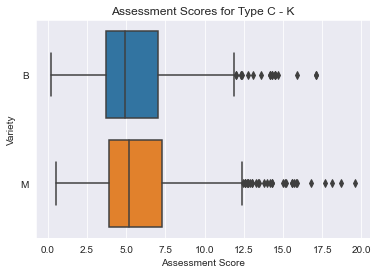

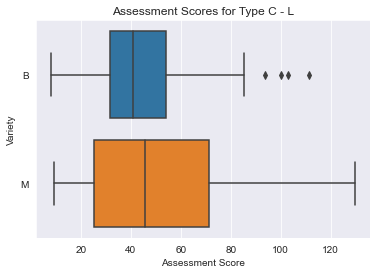

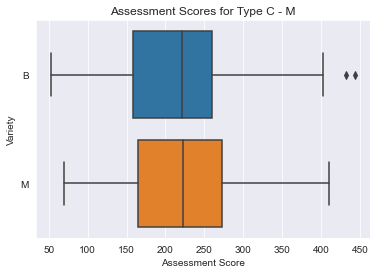

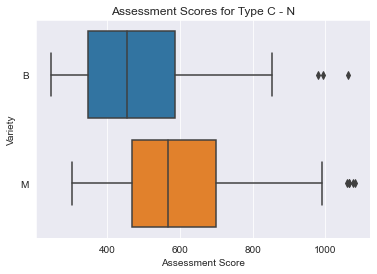

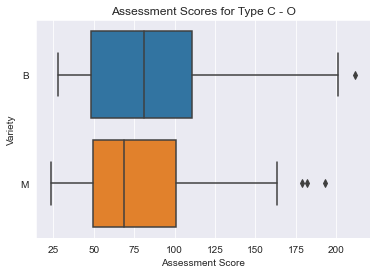

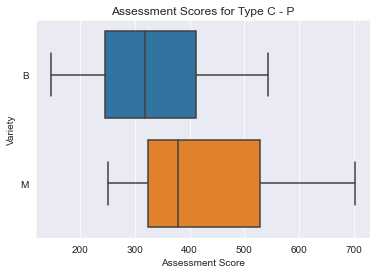

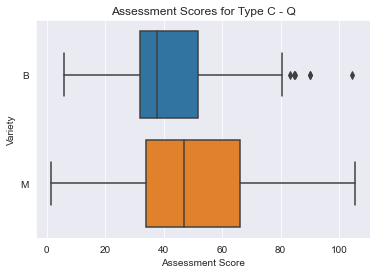

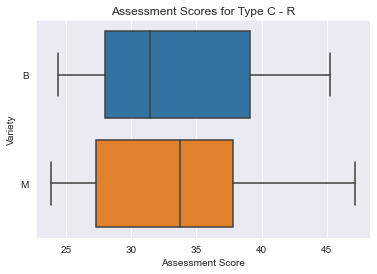

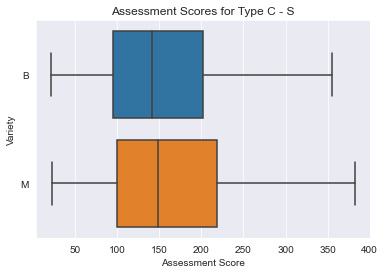

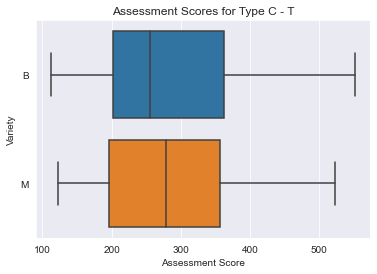

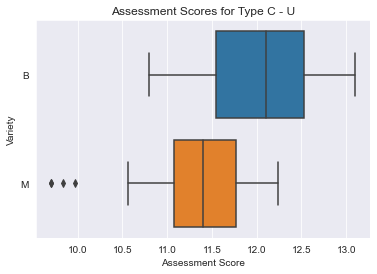

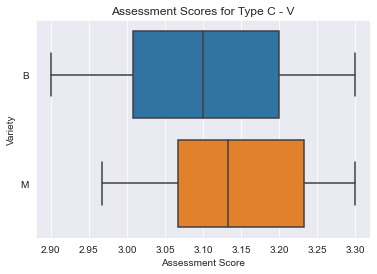

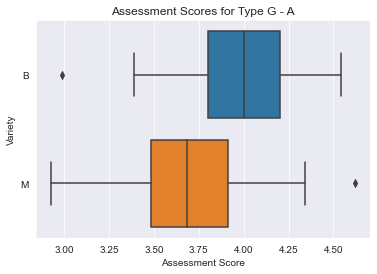

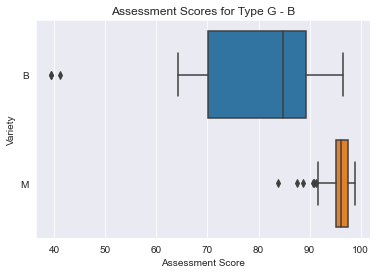

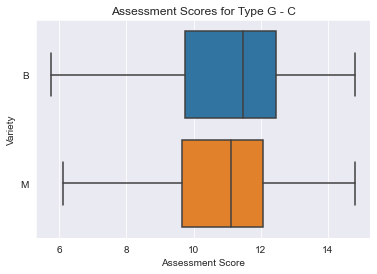

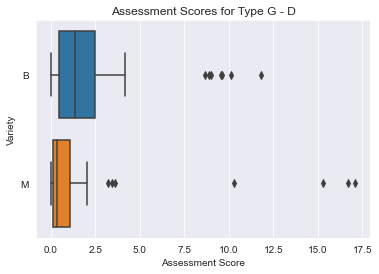

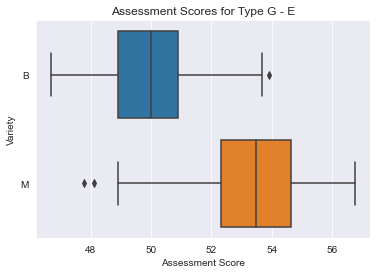

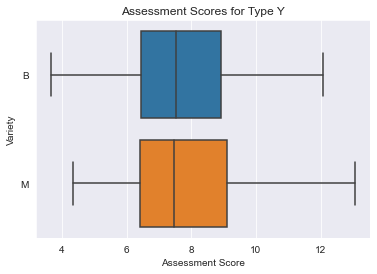

In [11]:
#loop through each assessment type
for Type in sorted(df_train['Assessment Type'].unique()):
    #create box plot for assessment score
    plt.title('Assessment Scores for Type'+' ' +Type)
    sns.boxplot(data=df_train[df_train['Assessment Type']==Type],x='Assessment Score',y='Variety',order=['B','M'])
    plt.show()

### Growth Stage

Growth Stage of crops doesn't appear to be normally distributed. There appears to be certain clusters of growth stages, such as between 10-40 and 50-90.

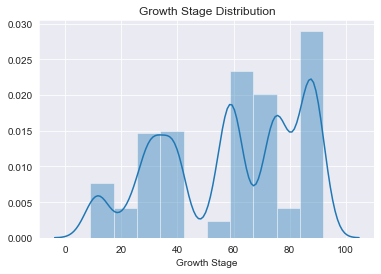

In [12]:
#create distribution plot for growth stage
sns.distplot(df_train['Growth Stage'],bins=10)
plt.title('Growth Stage Distribution')
plt.show()

We can see that Assessment Score is relatively independent of Growth Stage - there doesn't seem to be a clear linear trend between the two variables. However, we can see that in certain ranges of Growth Stages result Assessment Score is poor. This is shown in approximately the 46-58, 60-73, 75-88 Growth Stage values. Interestingly, for the specific values between these ranges (59, 74), the distribution of assessment scores goes back to normal.

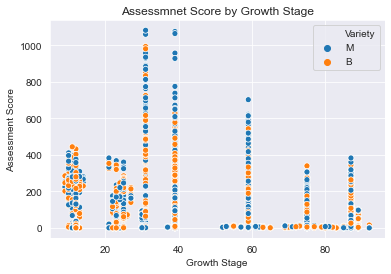

In [13]:
#create scatterplot of growth stage and assessment score
sns.scatterplot(data=df_train, x='Growth Stage',y='Assessment Score',hue='Variety')
plt.title('Assessmnet Score by Growth Stage')
plt.show()

### Time of Year

The assessment month of crops spans all 12 months and appears to be normally distributed, centered around the month of June. Each variety of crop evenly represented for each month.

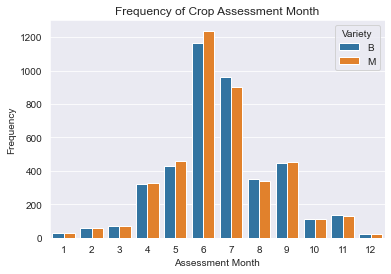

In [14]:
#create histogram for assessment month
sns.countplot(x=df_train['Assessment Date (mm/dd/year)'].dt.month,hue=df_train['Variety'],hue_order=['B','M'])
plt.title('Frequency of Crop Assessment Month')
plt.ylabel('Frequency')
plt.xlabel('Assessment Month')
plt.show()

Assessment Score seems to spike for Assessment Dates that occur during October and November. Interestingly, some of the lowest Assessment Scores occur right before this, during the months of August and September.

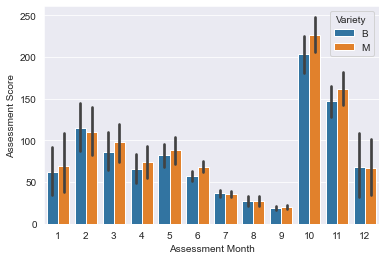

In [15]:
#create bar plot for with assessment date along x-axis and assessment score along y-axis
sns.barplot(x=df_train['Assessment Date (mm/dd/year)'].dt.month,hue=df_train['Variety'],hue_order=['B','M'],y=df_train['Assessment Score'])
plt.xlabel('Assessment Month')
plt.show()

The sowing month for crops appears to only take place in  September and October, with the latter representing the majority of cases. Again, crop variety is evenly balanced for both months. 

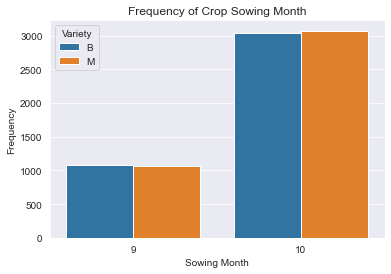

In [16]:
#create bar plot for sowing month frequency
sns.countplot(x=df_train['Sowing Date (mm/dd/year)'].dt.month,hue=df_train['Variety'],hue_order=['B','M'])
plt.title('Frequency of Crop Sowing Month')
plt.ylabel('Frequency')
plt.xlabel('Sowing Month')
plt.show()

Crops with Sowing Dates in September seem to be assessed slightly higher than those in October. However, the level of significance for assessment scores in September is less due to the fewer samples. 

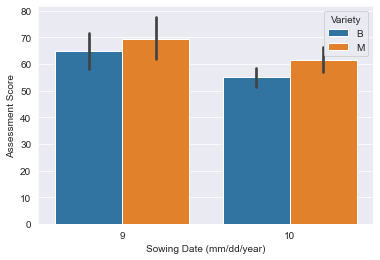

In [17]:
#create bar plot of sowing date on x-axis and assessment score on y-axis
sns.barplot(x=df_train['Sowing Date (mm/dd/year)'].dt.month,hue=df_train['Variety'],hue_order=['B','M'],y=df_train['Assessment Score'])
plt.show()

Harvest months only include August and September, with the former representing the majority of cases. Both crop varieties are evenly distributed for each month.

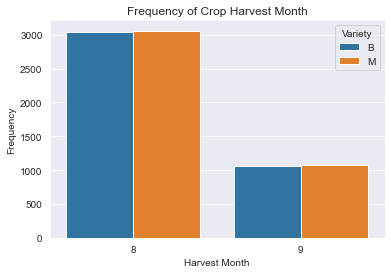

In [18]:
#create bar plot of harvest month frequencies
sns.countplot(x=df_train['Harvest Date (mm/dd/year)'].dt.month,hue=df_train['Variety'],hue_order=['B','M'])
plt.title('Frequency of Crop Harvest Month')
plt.ylabel('Frequency')
plt.xlabel('Harvest Month')
plt.show()

August harvested crops seem to be assessed slightly lower.

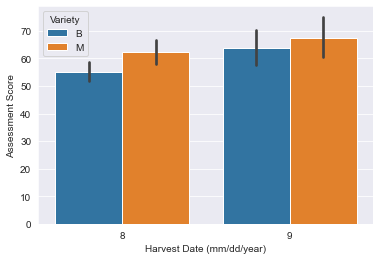

In [19]:
#create bar plot of harvest date on x-axis and assessment score on y-axis
sns.barplot(x=df_train['Harvest Date (mm/dd/year)'].dt.month,hue=df_train['Variety'],hue_order=['B','M'],y=df_train['Assessment Score'])
plt.show()

### Location

There are 5 different crop sites, and each site has slightly different attributes from year to year. Below we plot the distribution for each site. 

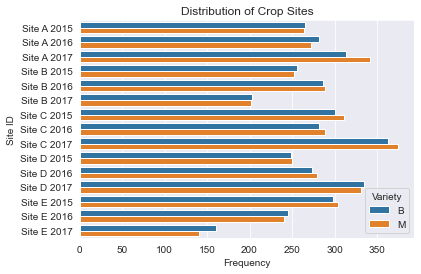

In [20]:
#create bar plot of site frequencies
sns.countplot(data=df_train,y='Site ID',hue='Variety',order = sorted(df_train['Site ID'].unique()),hue_order=['B','M'])
plt.title('Distribution of Crop Sites')
plt.xlabel('Frequency')
plt.show()

Certain Sites have higher Assessment Scores than others. For instance, Site D consistently ranks below Site B.

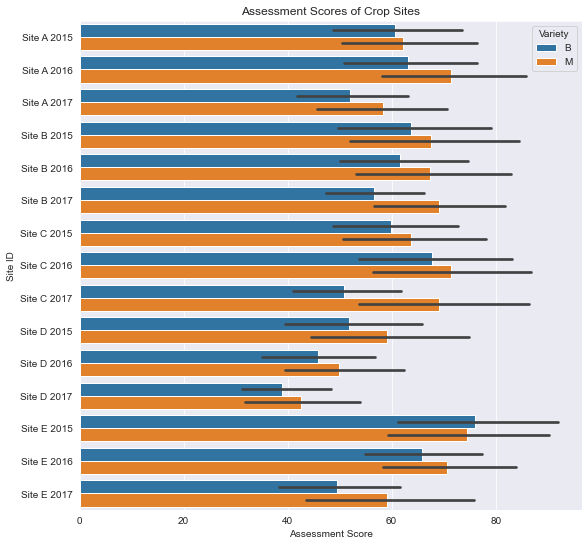

In [21]:
#create bar plot with assessment score on x-axis and site on y-axis
plt.figure(figsize=(9,9))
sns.barplot(data=df_train,x='Assessment Score',y='Site ID',hue='Variety',order = sorted(df_train['Site ID'].unique()),hue_order=['B','M'])
plt.title('Assessment Scores of Crop Sites')
plt.xlabel('Assessment Score')
plt.show()

## Data Processing

### Parsing Weather Data

The Weather Data still needs to be integrated in to the DataFrame. The structure of Weather Data will not allow it to merge cleanly in to the rest of the data, so we will need to get creative. We will begin by computing various summary statistics for the group of weather reports that occur from the crop's sowing date to harvest date and sowing date to assessment date.Then, we will add these statistics to the DataFrame for each entry. 

In [22]:
def parseWeather(row):
    
    #filter weather data for crops in matching site and time frame
    assessment_group = weather_data[(weather_data['Date (mm/dd/year)']>=row['Sowing Date (mm/dd/year)'])&(weather_data['Date (mm/dd/year)']<=row['Assessment Date (mm/dd/year)']) & (weather_data['Site ID']==row['Site ID'])]
    harvest_group = weather_data[(weather_data['Date (mm/dd/year)']>=row['Sowing Date (mm/dd/year)'])&(weather_data['Date (mm/dd/year)']<=row['Harvest Date (mm/dd/year)'])& (weather_data['Site ID']==row['Site ID'])]
    
    #loop through each weather variable
    solutions = []
    for char in ['A','B','C','D','E','F']:
        
        #add summary statistics for sow-assessment group
        assessment_var = assessment_group['Weather Variable '+char]
        
        solutions.append(assessment_var.mean())
        solutions.append(assessment_var.std())
        
        solutions.append(assessment_var.min())
        solutions.append(assessment_var.max())
        
        solutions.append(assessment_var.quantile(.25))
        solutions.append(assessment_var.quantile(.50))
        solutions.append(assessment_var.quantile(.75))
                
        #add summary statistics for sow-harvest group
        harvest_var = harvest_group['Weather Variable '+char]
        
        solutions.append(harvest_var.mean())
        solutions.append(harvest_var.std())
        
        solutions.append(harvest_var.min())
        solutions.append(harvest_var.max())
        
        solutions.append(harvest_var.quantile(.25))
        solutions.append(harvest_var.quantile(.50))
        solutions.append(harvest_var.quantile(.75))
        
    if len(solutions)!=84:
        print('issue')
        print(row['ID'])
        
    return solutions

#create set of labels for dataframe columns
labels=[]
for char in ['A','B','C','D','E','F']:
    labels.append(char+'_mean_a')
    labels.append(char+'_std_a')
    labels.append(char+'_min_a')
    labels.append(char+'_max_a')
    labels.append(char+'_25_a')
    labels.append(char+'_50_a')
    labels.append(char+'_75_a')
    labels.append(char+'_mean_h')
    labels.append(char+'_std_h')
    labels.append(char+'_min_h')
    labels.append(char+'_max_h')
    labels.append(char+'_25_h')
    labels.append(char+'_50_h')
    labels.append(char+'_75_h')

#apply function to update dataframe
df_train[labels] = df_train.apply(lambda x: pd.Series(parseWeather(x)), axis=1)
df_test[labels] = df_test.apply(lambda x: pd.Series(parseWeather(x)), axis=1)
df_train[labels].head()

,A_mean_a,A_std_a,A_min_a,A_max_a,A_25_a,A_50_a,A_75_a,A_mean_h,A_std_h,A_min_h,...,F_25_a,F_50_a,F_75_a,F_mean_h,F_std_h,F_min_h,F_max_h,F_25_h,F_50_h,F_75_h
1189,9.332663,3.520960,0.90,17.30,6.60,9.90,11.95,12.303750,5.467601,0.90,...,88.00000,96.00000,100.000000,87.609375,11.748164,51.000000,100.0,79.7500,89.000000,99.000000
8694,11.255147,4.254484,1.20,22.00,8.00,11.30,13.90,12.533956,4.998869,1.20,...,84.63000,90.64500,94.475000,88.688910,6.428629,70.300000,100.0,83.7600,89.590000,93.840000
388,14.565868,5.440933,3.00,32.00,11.00,14.00,18.00,14.028662,5.110517,3.00,...,70.00000,76.00000,85.000000,77.149682,10.182043,47.000000,99.0,71.0000,77.000000,85.000000
3147,13.193281,4.756824,3.20,26.30,9.40,13.10,16.00,15.105195,6.079584,3.20,...,75.00000,84.00000,92.000000,81.000000,11.832160,50.000000,100.0,72.0000,82.000000,91.250000
9756,11.564545,5.307012,0.95,25.39,7.65,11.16,15.40,12.345335,5.680514,0.95,...,87.34625,92.35125,99.905417,91.459012,7.220814,63.439333,100.0,86.2175,91.896458,99.222917


### Feature Engineering

We will begin feature engineering by calculating the elapsed time between each of the date columns in the DataFrame: Sowing Date, Harvest Date, and Assessment Date. It is important to note that some values for Harvest to Assessment are negative, as the crop was assessed before it was harvested for these entries.

In [23]:
#calculate time difference between each of the dates 
df_train['Sow to Assessment']= (df_train['Assessment Date (mm/dd/year)']-df_train['Sowing Date (mm/dd/year)']).dt.days
df_train['Sow to Harvest']= (df_train['Harvest Date (mm/dd/year)']-df_train['Sowing Date (mm/dd/year)']).dt.days
df_train['Harvest to Assessment']= (df_train['Assessment Date (mm/dd/year)']-df_train['Harvest Date (mm/dd/year)']).dt.days

df_test['Sow to Assessment']= (df_test['Assessment Date (mm/dd/year)']-df_test['Sowing Date (mm/dd/year)']).dt.days
df_test['Sow to Harvest']= (df_test['Harvest Date (mm/dd/year)']-df_test['Sowing Date (mm/dd/year)']).dt.days
df_test['Harvest to Assessment']= (df_test['Assessment Date (mm/dd/year)']-df_test['Harvest Date (mm/dd/year)']).dt.days

df_train[['Sowing Date (mm/dd/year)','Harvest Date (mm/dd/year)','Assessment Date (mm/dd/year)','Sow to Assessment','Sow to Harvest','Harvest to Assessment']].head()

,Sowing Date (mm/dd/year),Harvest Date (mm/dd/year),Assessment Date (mm/dd/year),Sow to Assessment,Sow to Harvest,Harvest to Assessment
1189,2015-10-02,2016-08-17,2016-04-18,199,320,-121
8694,2015-10-08,2016-08-24,2016-07-06,272,321,-49
388,2015-09-29,2016-08-08,2016-09-30,367,314,53
3147,2015-10-27,2016-08-30,2016-07-06,253,308,-55
9756,2014-10-13,2015-09-06,2015-08-06,297,328,-31


Next, we will parse just the site name - leaving out the site year - from the Site ID column, and assign it to a new column, Site. This may help the machine learning models generalize for any test data past the year 2017. We then drop Site ID column, as we do not want the machine learning model to fit to certain years. 

In [24]:
#remove year from Site ID and assign it to Site column
df_train['Site']=df_train['Site ID'].apply(lambda x: x[:-5])
df_test['Site']=df_test['Site ID'].apply(lambda x: x[:-5])
df_train[['Site ID','Site']].head()

,Site ID,Site
1189,Site C 2016,Site C
8694,Site D 2016,Site D
388,Site E 2016,Site E
3147,Site B 2016,Site B
9756,Site C 2015,Site C


In [25]:
df_train.drop(columns='Site ID',inplace=True)
df_test.drop(columns='Site ID',inplace=True)

Finally, we will extract the relevant information from the date columns (month, day and weekday) so that we can feed it in to the machine learning models later on. We will leave out the year column to prevent over-fitting. The year an event occurred is not repeatable, so it shouldn't be useful in predictions. 

In [26]:
#extract sowing date information 
df_train['Sowing Month']=df_train['Sowing Date (mm/dd/year)'].dt.month.astype(str)
df_train['Sowing Day']=df_train['Sowing Date (mm/dd/year)'].dt.day.astype(str)
df_train['Sowing Weekday']=df_train['Sowing Date (mm/dd/year)'].dt.weekday.astype(str)
df_train['Sowing Day of Year']=df_train['Sowing Date (mm/dd/year)'].dt.dayofyear.astype(str)

df_test['Sowing Month']=df_test['Sowing Date (mm/dd/year)'].dt.month.astype(str)
df_test['Sowing Day']=df_test['Sowing Date (mm/dd/year)'].dt.day.astype(str)
df_test['Sowing Weekday']=df_test['Sowing Date (mm/dd/year)'].dt.weekday.astype(str)
df_test['Sowing Day of Year']=df_test['Sowing Date (mm/dd/year)'].dt.dayofyear.astype(str)

#extract harvest date information
df_train['Harvest Month']=df_train['Harvest Date (mm/dd/year)'].dt.month.astype(str)
df_train['Harvest Day']=df_train['Harvest Date (mm/dd/year)'].dt.day.astype(str)
df_train['Harvest Weekday']=df_train['Harvest Date (mm/dd/year)'].dt.weekday.astype(str)
df_train['Harvest Day of Year']=df_train['Harvest Date (mm/dd/year)'].dt.dayofyear.astype(str)

df_test['Harvest Month']=df_test['Harvest Date (mm/dd/year)'].dt.month.astype(str)
df_test['Harvest Day']=df_test['Harvest Date (mm/dd/year)'].dt.day.astype(str)
df_test['Harvest Weekday']=df_test['Harvest Date (mm/dd/year)'].dt.weekday.astype(str)
df_test['Harvest Day of Year']=df_test['Harvest Date (mm/dd/year)'].dt.dayofyear.astype(str)

#extract assessment date information
df_train['Assessment Month']=df_train['Assessment Date (mm/dd/year)'].dt.month.astype(str)
df_train['Assessment Day']=df_train['Assessment Date (mm/dd/year)'].dt.day.astype(str)
df_train['Assessment Weekday']=df_train['Assessment Date (mm/dd/year)'].dt.weekday.astype(str)
df_train['Assessment Day of Year']=df_train['Assessment Date (mm/dd/year)'].dt.dayofyear.astype(str)

df_test['Assessment Month']=df_test['Assessment Date (mm/dd/year)'].dt.month.astype(str)
df_test['Assessment Day']=df_test['Assessment Date (mm/dd/year)'].dt.day.astype(str)
df_test['Assessment Weekday']=df_test['Assessment Date (mm/dd/year)'].dt.weekday.astype(str)
df_test['Assessment Day of Year']=df_test['Assessment Date (mm/dd/year)'].dt.dayofyear.astype(str)

#display new columns
df_train[['Sowing Date (mm/dd/year)','Harvest Date (mm/dd/year)','Assessment Date (mm/dd/year)','Sowing Month','Sowing Day',
          'Sowing Weekday','Sowing Day of Year','Harvest Month','Harvest Day','Harvest Weekday','Harvest Day of Year',
          'Assessment Month','Assessment Day','Assessment Weekday','Assessment Day of Year']].head()

,Sowing Date (mm/dd/year),Harvest Date (mm/dd/year),Assessment Date (mm/dd/year),Sowing Month,Sowing Day,Sowing Weekday,Sowing Day of Year,Harvest Month,Harvest Day,Harvest Weekday,Harvest Day of Year,Assessment Month,Assessment Day,Assessment Weekday,Assessment Day of Year
1189,2015-10-02,2016-08-17,2016-04-18,10,2,4,275,8,17,2,230,4,18,0,109
8694,2015-10-08,2016-08-24,2016-07-06,10,8,3,281,8,24,2,237,7,6,2,188
388,2015-09-29,2016-08-08,2016-09-30,9,29,1,272,8,8,0,221,9,30,4,274
3147,2015-10-27,2016-08-30,2016-07-06,10,27,1,300,8,30,1,243,7,6,2,188
9756,2014-10-13,2015-09-06,2015-08-06,10,13,0,286,9,6,6,249,8,6,3,218


Now that we have extracted all information from the date columns, we will drop these. We do this because datetime objects can not be fit to the machine learning models that will be used.

In [27]:
#drop original date columns
df_train.drop(columns=['Sowing Date (mm/dd/year)','Harvest Date (mm/dd/year)','Assessment Date (mm/dd/year)'],inplace=True)
df_test.drop(columns=['Sowing Date (mm/dd/year)','Harvest Date (mm/dd/year)','Assessment Date (mm/dd/year)'],inplace=True)

### Missing Values

Let's take a look at the missing values in the DataFrame. There are values missing for Assessment Score and many of the weather related columns. All of the weather columns are missing 16 (13 for train and 3 for test) values, so it is likely the same 16 entries for each. There must have been no weather reports during the life cycle for these crops.

In [28]:
#show column names with missing values and quantity
print('Train:')
for column in df_train.columns[df_train.isnull().any()]:
    print(column, df_train[column].isnull().sum())

print('Test')
for column in df_test.columns[df_test.isnull().any()]:
    print(column, df_test[column].isnull().sum())

Train:
Assessment Score 12
A_mean_a 13
A_std_a 13
A_min_a 13
A_max_a 13
A_25_a 13
A_50_a 13
A_75_a 13
B_mean_a 13
B_std_a 13
B_min_a 13
B_max_a 13
B_25_a 13
B_50_a 13
B_75_a 13
C_mean_a 13
C_std_a 13
C_min_a 13
C_max_a 13
C_25_a 13
C_50_a 13
C_75_a 13
D_mean_a 13
D_std_a 13
D_min_a 13
D_max_a 13
D_25_a 13
D_50_a 13
D_75_a 13
E_mean_a 13
E_std_a 13
E_min_a 13
E_max_a 13
E_25_a 13
E_50_a 13
E_75_a 13
F_mean_a 13
F_std_a 13
F_min_a 13
F_max_a 13
F_25_a 13
F_50_a 13
F_75_a 13
Test
Assessment Score 2
A_mean_a 3
A_std_a 3
A_min_a 3
A_max_a 3
A_25_a 3
A_50_a 3
A_75_a 3
B_mean_a 3
B_std_a 3
B_min_a 3
B_max_a 3
B_25_a 3
B_50_a 3
B_75_a 3
C_mean_a 3
C_std_a 3
C_min_a 3
C_max_a 3
C_25_a 3
C_50_a 3
C_75_a 3
D_mean_a 3
D_std_a 3
D_min_a 3
D_max_a 3
D_25_a 3
D_50_a 3
D_75_a 3
E_mean_a 3
E_std_a 3
E_min_a 3
E_max_a 3
E_25_a 3
E_50_a 3
E_75_a 3
F_mean_a 3
F_std_a 3
F_min_a 3
F_max_a 3
F_25_a 3
F_50_a 3
F_75_a 3


Now we will impute these missing values. For the weather columns, we will take the mean of each Site and Sowing Month group to fill in the missing data. For Assessment Score we will impute based on mean of Assessment Type. Normally we would not impute for the target label, but the challenge specifies we need a prediction for each row.

In [29]:
#fill Assessment Score column
df_train['Assessment Score']=df_train['Assessment Score'].fillna(df_train.groupby(['Assessment Type'])['Assessment Score'].transform('mean'))

for atype in df_test['Assessment Type'].unique():
    train_mask = df_train['Assessment Type']==atype
    test_mask = df_test['Assessment Type']==atype
    mean = df_train.loc[train_mask,'Assessment Score'].mean()
    df_test.loc[test_mask,'Assessment Score'] = df_test.loc[test_mask,'Assessment Score'].fillna(mean)
    
#fill weather columns
for column in df_train.columns[df_train.isnull().any()]:
    df_train[column]=df_train[column].fillna(df_train.groupby(['Site','Sowing Month'])[column].transform('mean'))

for column in df_test.columns[df_test.isnull().any()]:
    for site in df_test['Site'].unique():
        for month in df_test['Sowing Month']:
            train_mask = (df_train['Site'] ==site) & (df_train['Sowing Month']==month)
            test_mask = (df_test['Site'] ==site) & (df_test['Sowing Month']==month)
            mean = df_train.loc[train_mask,column].mean()
            df_test.loc[test_mask,column]=df_test.loc[test_mask,column].fillna(mean)

### Machine Learning Pre-Processing

Now we will prepare the data to be fed in to the machine learning models. Before we alter the DataFrame, we will create a benchmark to judge the models against. For this benchmark, we will calculate the MAE for the average assessment score of each assessment type and the actual values. The benchmark achieves a score of 19.39.

In [30]:
#get average assessment score for each assessment type
solutions = []
def getScores(row):
    group = df_train[df_train['Assessment Type']==row['Assessment Type']]
    score = group['Assessment Score'].mean()
    solutions.append(score)

df_train.apply(lambda x: getScores(x),axis=1)

#show benchmark score 
print('Benchmark:',MAE(pd.Series(solutions),df_train['Assessment Score']))

Benchmark: 19.388057744343257


To prepare our data for machine learning, we will need to dummy the categorical columns and standardize the continuous columns. 

In [31]:
#dummy columns
categorical=['Variety','Assessment Type','Site','Sowing Month','Sowing Weekday','Harvest Month','Harvest Weekday'
             ,'Assessment Month','Assessment Weekday']

dummies = pd.get_dummies(df_train[categorical])
df_train.drop(columns=categorical,inplace=True)
df_train = pd.concat([df_train,dummies],axis=1)

dummies = pd.get_dummies(df_test[categorical])
df_test.drop(columns=categorical,inplace=True)
df_test = pd.concat([df_test,dummies],axis=1)

df_test = df_test[df_train.columns]

#scale columns
numerical = labels + ['Growth Stage','Latitude','Elevation (m)','Soil Parameter A','Soil Parameter B',
                      'Amount Fertilizer Applied','Sowing Day','Harvest Day','Assessment Day','Sowing Day of Year',
                      'Harvest Day of Year','Assessment Day of Year','Harvest to Assessment','Sow to Assessment',
                     'Sow to Harvest']

scaler = StandardScaler()

df_train[numerical] = scaler.fit_transform(df_train[numerical])
df_test[numerical] = scaler.transform(df_test[numerical])

#show shape of new dataframe
df_train.shape

(8250, 171)

### Principal Component Analysis

Before fitting the data to machine learning models, we will make sure we eliminate any multicolinearity between the features. Below we show a heatmap of the feature correlations. 

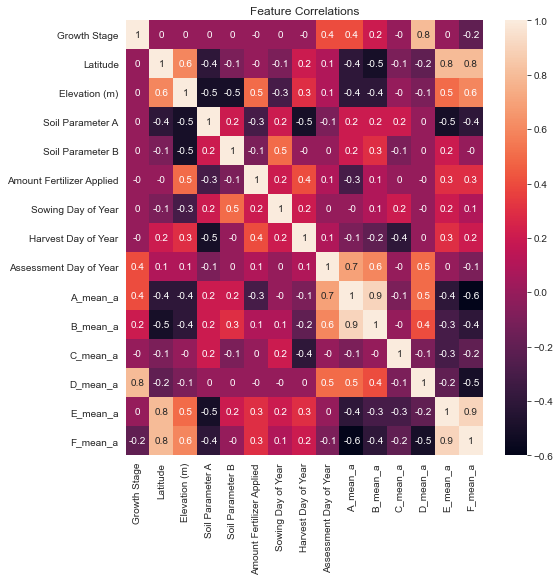

In [32]:
#select features to plot
check = ['Growth Stage','Latitude','Elevation (m)','Soil Parameter A','Soil Parameter B','Amount Fertilizer Applied',
         'Sowing Day of Year','Harvest Day of Year','Assessment Day of Year','A_mean_a','B_mean_a','C_mean_a','D_mean_a',
         'E_mean_a','F_mean_a']


plt.figure(figsize=(8,8))
sns.heatmap(df_train[check].corr().round(1),annot=True)
plt.title('Feature Correlations')
plt.show()

Clearly, many of the features are highly correlated. For this reason, we will apply principal component analysis to the numerical features. We create an elbow plot to show the amount of variance explained for each number of principal components.

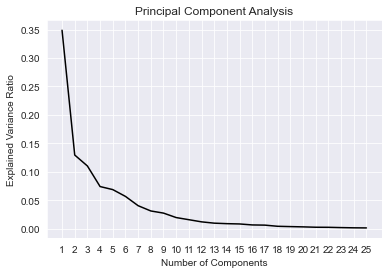

In [33]:
#fit PCA for all numerical columns
pca = PCA()
pca.fit(df_train[numerical])

#plot explained variance ratio by number of components
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Principal Component Analysis')
sns.lineplot(x=np.arange(25)+1, y=pca.explained_variance_ratio_[:25], color='black')
plt.xticks(np.arange(25)+1)
plt.show()

Based on the scree plot above, we will choose 5 principal components to use in the dataset.

In [34]:
#apply pca to data
components=5
pca=PCA(n_components=components)
pc_train = pca.fit_transform(df_train[numerical])
pc_test = pca.transform(df_test[numerical])

#add pcs to dataframe
df_train.drop(columns=numerical,inplace=True)
df_test.drop(columns=numerical,inplace=True)

component_labels = []
for pc in range(1,components+1):
    df_train['PC'+str(pc)]=pc_train.transpose()[pc-1]
    df_test['PC'+str(pc)]=pc_test.transpose()[pc-1]
    component_labels.append('PC'+str(pc))
    
df_train[component_labels].head()

,PC1,PC2,PC3,PC4,PC5
1189,-8.506428,3.366854,2.263424,-1.139848,-1.233726
8694,-6.676847,0.734402,-1.425177,-0.106531,0.580892
388,10.364653,-3.756841,-2.446504,0.670316,3.612804
3147,4.067559,-4.549192,1.468565,-0.419846,-4.425359
9756,-5.743193,-2.864114,-0.727124,1.054091,0.468126


We view the makeups of the principal components for a subset of features.

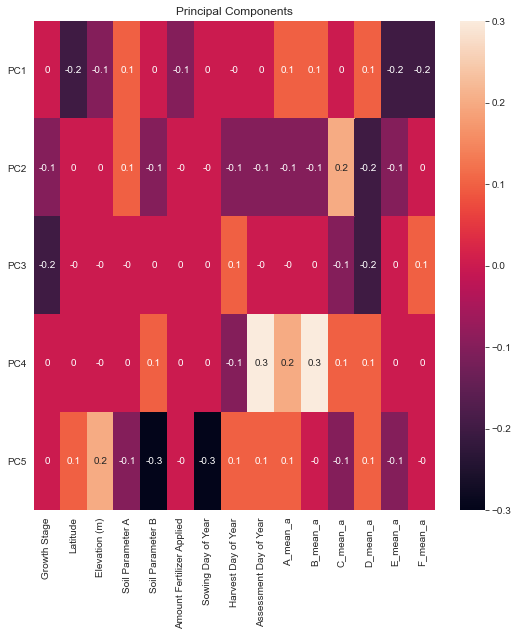

In [35]:
components = pd.DataFrame(pca.components_,index=component_labels,columns=numerical)

#method to create graph from:
#https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

#plot principal components make-ups
plt.figure(figsize=(9,9))
sns.heatmap(components[check].round(1),yticklabels=[ "PC"+str(x) for x in range(1,pca.n_components_+1)],xticklabels=check,
            annot=True)

#label plot
plt.title('Principal Components')
plt.yticks(rotation=0) 

plt.show()

## Model Building

Finally we separate the predictive features and target label. We are know ready to fit the data to machine learning models.

In [36]:
#seperate features and target label
X_train = df_train.drop(columns=['Assessment Score','ID'])
X_test = df_test.drop(columns=['Assessment Score','ID'])
y_train = df_train['Assessment Score']
y_test = df_test['Assessment Score']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8250, 75)
(8250,)
(2063, 75)
(2063,)


### Lasso

We will begin the model building phase with Lasso Regression. This is a type of linear regression, which performs well on sparse datasets like this one. We will use GridSearchCV with 10 folds to tune the alpha parameter. After the model has been fitted and made its predictions, we will calculate the MAE on the train set and test set. On the train set, the model scores an MAE of 21.93, and on the test set, the model scores an MAE of 22.46. The benchmark had an MAE of 19.39, so Lasso Regression doesn't seem to be a good model for this task. 

In [48]:
#create GridSearchCV object with KNeighborsClassifier as estimator
param_grid = {'alpha': [.00001,.0001,.001,.01,.1,1]}
LaR = GridSearchCV(Lasso(max_iter=100000), n_jobs=-1, cv=5, param_grid=param_grid)

#fit on train data
LaR.fit(X_train, y_train)

#predict on train and test data
train_pred = LaR.predict(X_train)
test_pred = LaR.predict(X_test)

#display score 
print('Train Error', MAE(train_pred,y_train))
print('Test Error', MAE(test_pred,y_test))

Train Error 21.8710971811478
Test Error 22.38221909996455


In [38]:
#show best parameters
LaR.best_params_

{'alpha': 0.0001}

### K-Neighbors

Next, we have K-Neighbor Regression. We will use GridSearchCV to to tune the n_neighbors, weights, and p parameter. This model scores an MAE of 4.20 on the train set, and an MAE of 6.25 on the test set. This performance is significantly better than Lasso and the benchmark. K-Neighbors seems to be an appropriate model for this task.

In [39]:
#create GridSearchCV object with KNeighborsClassifier as estimator
param_grid = {'n_neighbors':[1,2,4,8,16,32],'weights':['distance','uniform'],'p':[1,2]}
KNR = GridSearchCV(KNeighborsRegressor(), n_jobs=-1, cv=10, param_grid=param_grid)

#fit on train data
KNR.fit(X_train, y_train)

#predict on train and test data
train_pred = KNR.predict(X_train)
test_pred = KNR.predict(X_test)

#display score 
print('Train Error', MAE(train_pred,y_train))
print('Test Error', MAE(test_pred,y_test))

Train Error 4.203409657999028
Test Error 6.249346996346563


In [40]:
#show best parameters
KNR.best_params_

{'n_neighbors': 16, 'p': 1, 'weights': 'distance'}

### Random Forest

Now, we will use Random Forest Regression. Again, we use GridSearchCV, this time to tune the max_depth and min_samples_leaf parameters. This model scores an MAE of 4.27 on the train set, and an MAE of 5.99 on the test set. This model performs slightly worse on the train set, but slightly better on the test set than K-Neighbors, meaning that this model is better able to generalize.

In [41]:
#set paramater list
param_grid = {'max_depth':[1,2,4,8,16,32,64],'min_samples_leaf':[1,2,4,8]}

#fit GridSearchCV
RFR = GridSearchCV(RandomForestRegressor(random_state=0,max_features='auto'),n_jobs=-1,scoring='neg_mean_absolute_error',
                   cv=10, param_grid=param_grid)
RFR.fit(X_train,y_train)

#use model to predict values
train_pred = RFR.predict(X_train)
test_pred = RFR.predict(X_test)

#display score 
print('Train Error', MAE(train_pred,y_train))
print('Test Error', MAE(test_pred,y_test))

Train Error 4.271362815109435
Test Error 5.989092150303565


In [42]:
#show best parameters
RFR.best_params_

{'max_depth': 64, 'min_samples_leaf': 1}

### Support Vector

Finally we have Support Vector Regression. We will use GridSearchCV to find the optimal kernel and C value. The chosen kernel is linear, making this model similar to Lasso Regression. This model scores 18.57 on the train set and 19.09 on the test set. Just like Lasso, this does not seem to be an appropriate model for this task either.

In [43]:
#set paramater list
param_grid = {'kernel':['linear','poly', 'rbf', 'sigmoid'],'C':[.01,.1,1,10,100]}

#fit GridSearchCV
SV = GridSearchCV(SVR(),n_jobs=-1,scoring='neg_mean_absolute_error',cv=5, param_grid=param_grid)
SV.fit(X_train,y_train)

#use model to predict values
train_pred = SV.predict(X_train)
test_pred = SV.predict(X_test)

#display score 
print('Train Error', MAE(train_pred,y_train))
print('Test Error', MAE(test_pred,y_test))

Train Error 18.56658073251786
Test Error 19.08709130504848


In [44]:
#show best parameters
SV.best_params_

{'C': 100, 'kernel': 'linear'}

## Conclusion

The best model for this task is Random Forest Regression. The GridSearchCV choose a very large value for max_depth (64). Despite this, the model was able to avoid over-fitting to the train set. Finally, we will fit an instance of the model over the entire dataset. We get an overall MAE of 4.33, significantly better than the benchmark score of 19.39.

In [45]:
#re-combine dataset
X = X_train.append(X_test)
y = y_train.append(y_test)

#fit model over entire dataset
RFR = RandomForestRegressor(random_state=0, max_features='auto', max_depth=64,min_samples_leaf=1)
RFR.fit(X, y)

#predict for entire dataset
all_pred = RFR.predict(X)

#show overall MAE
print('Overall Error', MAE(all_pred,y))

Overall Error 4.330768340473655


Let's examine which features were most influential in predicting assessment score. Clearly, assessment type played the largest impact on the assessment score of the crop. The principal components also played a large role in the assessment score. Oddly, PC3 does not appear on the list, but PC4 and PC5 do.

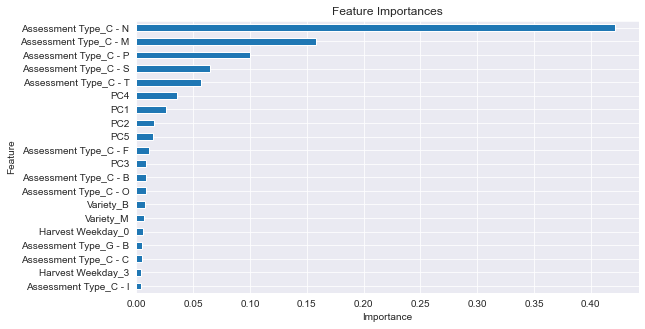

In [46]:
#chart feature importances
feature_importances = pd.Series(RFR.feature_importances_,index = X.columns)
plt.figure(figsize=(9,5))
feature_importances.sort_values()[-20:].plot(kind='barh')
plt.title('Feature Importances')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

Finally, we will compile the final results in to an excel file.

In [47]:
#put final results in dataframe
final =pd.DataFrame(all_pred)
final.to_excel('answers.xlsx')